# STAR WARS: The Data Strikes Back

In [1]:
#import dependencies
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats as sts
from scipy.stats import linregress
import seaborn as sns

In [2]:
#API Calls - Endpoints with responses to reference 
##films
url_films = "http://swapi.dev/api/films/" 
films_response = requests.get(url_films).json()

##people
url_people = "http://swapi.dev/api/people/" 
people_response = requests.get(url_people).json()

##planets
url_planets = "http://swapi.dev/api/planets/"
planets_response = requests.get(url_planets).json()

##species
url_species = "http://swapi.dev/api/species/" 
species_response = requests.get(url_species).json()

##vehicles
url_vehicles = "http://swapi.dev/api/vehicles/" 
vehicles_response = requests.get(url_vehicles).json()

##starships
url_starships = "http://swapi.dev/api/starships/"
starships_response = requests.get(url_starships).json()

# Star Wars Film Call & Responses

In [3]:
#API Call for films
url_films = "http://swapi.dev/api/films/" 
films_response = requests.get(url_films).json()
## Film json dump (captioned out to save space)
print(json.dumps(films_response, indent=2, sort_keys=True))

{
  "count": 6,
  "next": null,
  "previous": null,
  "results": [
    {
      "characters": [
        "http://swapi.dev/api/people/1/",
        "http://swapi.dev/api/people/2/",
        "http://swapi.dev/api/people/3/",
        "http://swapi.dev/api/people/4/",
        "http://swapi.dev/api/people/5/",
        "http://swapi.dev/api/people/6/",
        "http://swapi.dev/api/people/7/",
        "http://swapi.dev/api/people/8/",
        "http://swapi.dev/api/people/9/",
        "http://swapi.dev/api/people/10/",
        "http://swapi.dev/api/people/12/",
        "http://swapi.dev/api/people/13/",
        "http://swapi.dev/api/people/14/",
        "http://swapi.dev/api/people/15/",
        "http://swapi.dev/api/people/16/",
        "http://swapi.dev/api/people/18/",
        "http://swapi.dev/api/people/19/",
        "http://swapi.dev/api/people/81/"
      ],
      "created": "2014-12-10T14:23:31.880000Z",
      "director": "George Lucas",
      "edited": "2014-12-20T19:49:45.256000Z",
   

## Pull all FILMS and specified data

In [4]:
#set up lists to store film data
film_counter=0
film_title = []
film_episode_id = []
film_release_date = []
film_url = []
species_per_film = []
characters_per_film = []

#loop through film data and append lists
for films in films_response["results"]:
    movie_title = films["title"]
    film_title.append(movie_title)
    episode_number = films["episode_id"]
    film_episode_id.append(episode_number)
    date_released = films["release_date"]
    film_release_date.append(date_released)
    movie_url = films["url"]
    film_url.append(movie_url)
    species_film = films["species"]
    species_per_film.append(species_film)
    film_characters = films["characters"]
    characters_per_film.append(film_characters)
    film_counter+=1
    print(f'Film {film_counter} Found! Star Wars Episode {episode_number}: {movie_title} | Release Date: {date_released}')
    

Film 1 Found! Star Wars Episode 4: A New Hope | Release Date: 1977-05-25
Film 2 Found! Star Wars Episode 5: The Empire Strikes Back | Release Date: 1980-05-17
Film 3 Found! Star Wars Episode 6: Return of the Jedi | Release Date: 1983-05-25
Film 4 Found! Star Wars Episode 1: The Phantom Menace | Release Date: 1999-05-19
Film 5 Found! Star Wars Episode 2: Attack of the Clones | Release Date: 2002-05-16
Film 6 Found! Star Wars Episode 3: Revenge of the Sith | Release Date: 2005-05-19


In [5]:
#create new dataframe for film data
films_df = pd.DataFrame({"Title": film_title,
                        "Episode ID": film_episode_id,
                        "Release Date": film_release_date,
                        "URL": film_url})

films_df.to_csv("csv_output/films_to_clean.csv")
films_df

,Title,Episode ID,Release Date,URL
0,A New Hope,4,1977-05-25,http://swapi.dev/api/films/1/
1,The Empire Strikes Back,5,1980-05-17,http://swapi.dev/api/films/2/
2,Return of the Jedi,6,1983-05-25,http://swapi.dev/api/films/3/
3,The Phantom Menace,1,1999-05-19,http://swapi.dev/api/films/4/
4,Attack of the Clones,2,2002-05-16,http://swapi.dev/api/films/5/
5,Revenge of the Sith,3,2005-05-19,http://swapi.dev/api/films/6/


In [6]:
films_chrono_df = films_df.sort_values("Episode ID", ascending = True)
films_chrono_df

,Title,Episode ID,Release Date,URL
3,The Phantom Menace,1,1999-05-19,http://swapi.dev/api/films/4/
4,Attack of the Clones,2,2002-05-16,http://swapi.dev/api/films/5/
5,Revenge of the Sith,3,2005-05-19,http://swapi.dev/api/films/6/
0,A New Hope,4,1977-05-25,http://swapi.dev/api/films/1/
1,The Empire Strikes Back,5,1980-05-17,http://swapi.dev/api/films/2/
2,Return of the Jedi,6,1983-05-25,http://swapi.dev/api/films/3/


# Star Wars Characters

In [7]:
# People/Characters json dump
print(json.dumps(people_response, indent=2, sort_keys=True))

{
  "count": 82,
  "next": "http://swapi.dev/api/people/?page=2",
  "previous": null,
  "results": [
    {
      "birth_year": "19BBY",
      "created": "2014-12-09T13:50:51.644000Z",
      "edited": "2014-12-20T21:17:56.891000Z",
      "eye_color": "blue",
      "films": [
        "http://swapi.dev/api/films/1/",
        "http://swapi.dev/api/films/2/",
        "http://swapi.dev/api/films/3/",
        "http://swapi.dev/api/films/6/"
      ],
      "gender": "male",
      "hair_color": "blond",
      "height": "172",
      "homeworld": "http://swapi.dev/api/planets/1/",
      "mass": "77",
      "name": "Luke Skywalker",
      "skin_color": "fair",
      "species": [],
      "starships": [
        "http://swapi.dev/api/starships/12/",
        "http://swapi.dev/api/starships/22/"
      ],
      "url": "http://swapi.dev/api/people/1/",
      "vehicles": [
        "http://swapi.dev/api/vehicles/14/",
        "http://swapi.dev/api/vehicles/30/"
      ]
    },
    {
      "birth_year": "112

In [8]:
#new lists to store character info
character_list = []
character_height = []
character_mass = []
character_species = []
character_first_movie = []
character_last_movie = []
character_number_movies = []
page = ["1", "2", "3", "4", "5", "6", "7", "8", "9"]
url_people_next = f"http://swapi.dev/api/people/?page="

for x in page:
    people_response_next = requests.get(url_people_next + x).json()
    
#for loop to list names
    for people in people_response_next["results"]:
        character_name = people["name"]
        character_list.append(character_name)
        
        height = people["height"]
        character_height.append(height)
        
        mass = people["mass"]
        character_mass.append(mass)
        
        char_species = people["species"]
        character_species.append(char_species)
        
        character_movie = people["films"][0]
        character_first_movie.append(character_movie)
        
        character_movie_last = people["films"][-1]
        character_last_movie.append(character_movie_last)
        
        character_movie_total = len(people["films"])
        character_number_movies.append(character_movie_total)
        print(f'{character_name} found!')

Luke Skywalker found!
C-3PO found!
R2-D2 found!
Darth Vader found!
Leia Organa found!
Owen Lars found!
Beru Whitesun lars found!
R5-D4 found!
Biggs Darklighter found!
Obi-Wan Kenobi found!
Anakin Skywalker found!
Wilhuff Tarkin found!
Chewbacca found!
Han Solo found!
Greedo found!
Jabba Desilijic Tiure found!
Wedge Antilles found!
Jek Tono Porkins found!
Yoda found!
Palpatine found!
Boba Fett found!
IG-88 found!
Bossk found!
Lando Calrissian found!
Lobot found!
Ackbar found!
Mon Mothma found!
Arvel Crynyd found!
Wicket Systri Warrick found!
Nien Nunb found!
Qui-Gon Jinn found!
Nute Gunray found!
Finis Valorum found!
Padmé Amidala found!
Jar Jar Binks found!
Roos Tarpals found!
Rugor Nass found!
Ric Olié found!
Watto found!
Sebulba found!
Quarsh Panaka found!
Shmi Skywalker found!
Darth Maul found!
Bib Fortuna found!
Ayla Secura found!
Ratts Tyerel found!
Dud Bolt found!
Gasgano found!
Ben Quadinaros found!
Mace Windu found!
Ki-Adi-Mundi found!
Kit Fisto found!
Eeth Koth found!
Adi Gall

In [9]:
#create new dataframe for all characters found with their data
characters_df = pd.DataFrame({"Character": character_list,
                              "Height": character_height,
                              "Mass": character_mass, 
                              "Species": character_species, 
                              "First Film": character_first_movie,
                              "Last Film": character_last_movie,
                              "Number of Film Appearances": character_number_movies})


characters_df.head(20)


,Character,Height,Mass,Species,First Film,Last Film,Number of Film Appearances
0,Luke Skywalker,172,77,[],http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,4
1,C-3PO,167,75,[http://swapi.dev/api/species/2/],http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,6
2,R2-D2,96,32,[http://swapi.dev/api/species/2/],http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,6
3,Darth Vader,202,136,[],http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,4
4,Leia Organa,150,49,[],http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,4
5,Owen Lars,178,120,[],http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,3
6,Beru Whitesun lars,165,75,[],http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,3
7,R5-D4,97,32,[http://swapi.dev/api/species/2/],http://swapi.dev/api/films/1/,http://swapi.dev/api/films/1/,1
8,Biggs Darklighter,183,84,[],http://swapi.dev/api/films/1/,http://swapi.dev/api/films/1/,1
9,Obi-Wan Kenobi,182,77,[],http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,6


In [10]:
#drop characters that don't have a height or mass listed and create new dataframe for tracking purposes
cleaning_characters_df = characters_df.drop(characters_df[characters_df['Height'] == 'unknown'].index) 
cleaning_characters_df = characters_df.drop(characters_df[characters_df['Mass'] == 'unknown'].index) 

print(cleaning_characters_df.head(20))

#output to CSV to add missing Species [http://swapi.dev/api/species/1/: Human]
cleaning_characters_df.to_csv("csv_output/character_output.csv")


                Character Height   Mass                            Species  \
0          Luke Skywalker    172     77                                 []   
1                   C-3PO    167     75  [http://swapi.dev/api/species/2/]   
2                   R2-D2     96     32  [http://swapi.dev/api/species/2/]   
3             Darth Vader    202    136                                 []   
4             Leia Organa    150     49                                 []   
5               Owen Lars    178    120                                 []   
6      Beru Whitesun lars    165     75                                 []   
7                   R5-D4     97     32  [http://swapi.dev/api/species/2/]   
8       Biggs Darklighter    183     84                                 []   
9          Obi-Wan Kenobi    182     77                                 []   
10       Anakin Skywalker    188     84                                 []   
12              Chewbacca    228    112  [http://swapi.dev/api/s

In [11]:
#input CSV with full Species values
cleaning_characters_df = pd.read_csv("csv_output/character_output_clean.csv")
#delete unnecessary column and clean values "1,358":1358 & "Jabba Desilijic Tiure" to "Jabba The Hutt"
del cleaning_characters_df['Unnamed: 0']
cleaning_characters_df=cleaning_characters_df.reset_index(drop=True)
#Manually cleaning Jabba's mass and name
cleaning_characters_df.iloc[[14],[2]]=1358
cleaning_characters_df.iloc[[14],[0]]="Jabba The Hutt"
cleaning_characters_df

,Character,Height,Mass,Species,First Film,Last Film,Number of Film Appearances
0,Luke Skywalker,172,77,['http://swapi.dev/api/species/1/'],http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,4
1,C-3PO,167,75,['http://swapi.dev/api/species/2/'],http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,6
2,R2-D2,96,32,['http://swapi.dev/api/species/2/'],http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,6
3,Darth Vader,202,136,['http://swapi.dev/api/species/1/'],http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,4
4,Leia Organa,150,49,['http://swapi.dev/api/species/1/'],http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,4
5,Owen Lars,178,120,['http://swapi.dev/api/species/1/'],http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,3
6,Beru Whitesun lars,165,75,['http://swapi.dev/api/species/1/'],http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,3
7,R5-D4,97,32,['http://swapi.dev/api/species/2/'],http://swapi.dev/api/films/1/,http://swapi.dev/api/films/1/,1
8,Biggs Darklighter,183,84,['http://swapi.dev/api/species/1/'],http://swapi.dev/api/films/1/,http://swapi.dev/api/films/1/,1
9,Obi-Wan Kenobi,182,77,['http://swapi.dev/api/species/1/'],http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,6


In [12]:
#remove [' '] from Species Column to prepare for merge
cleaning_characters_df['Species'] = cleaning_characters_df['Species'].str.replace("[","")
cleaning_characters_df['Species'] = cleaning_characters_df['Species'].str.replace("]","")
cleaning_characters_df['Species'] = cleaning_characters_df['Species'].str.replace("'","")
cleaning_characters_df.head()

,Character,Height,Mass,Species,First Film,Last Film,Number of Film Appearances
0,Luke Skywalker,172,77,http://swapi.dev/api/species/1/,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,4
1,C-3PO,167,75,http://swapi.dev/api/species/2/,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,6
2,R2-D2,96,32,http://swapi.dev/api/species/2/,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,6
3,Darth Vader,202,136,http://swapi.dev/api/species/1/,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,4
4,Leia Organa,150,49,http://swapi.dev/api/species/1/,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,4


In [13]:
#Change "Species" column name to "URL" for merge (below after Species API pull)

cleaner_characters_df = cleaning_characters_df.rename(columns={"Species": "URL"})
cleaner_characters_df.head()

,Character,Height,Mass,URL,First Film,Last Film,Number of Film Appearances
0,Luke Skywalker,172,77,http://swapi.dev/api/species/1/,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,4
1,C-3PO,167,75,http://swapi.dev/api/species/2/,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,6
2,R2-D2,96,32,http://swapi.dev/api/species/2/,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,6
3,Darth Vader,202,136,http://swapi.dev/api/species/1/,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,4
4,Leia Organa,150,49,http://swapi.dev/api/species/1/,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,4


In [14]:
clean_char_height_series = pd.to_numeric(cleaner_characters_df["Height"])
clean_char_mass_series = pd.to_numeric(cleaner_characters_df["Mass"])


clean_characters_df = pd.DataFrame({"Character": cleaner_characters_df["Character"],
                                 "Height": clean_char_height_series,
                                 "Mass": clean_char_mass_series,
                                 "URL": cleaner_characters_df["URL"], 
                                 "First Film": cleaner_characters_df["First Film"],
                                 "Last Film": cleaner_characters_df["Last Film"],
                                 "Number of Film Appearances": cleaner_characters_df["Number of Film Appearances"]})
clean_characters_df

,Character,Height,Mass,URL,First Film,Last Film,Number of Film Appearances
0,Luke Skywalker,172,77.0,http://swapi.dev/api/species/1/,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,4
1,C-3PO,167,75.0,http://swapi.dev/api/species/2/,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,6
2,R2-D2,96,32.0,http://swapi.dev/api/species/2/,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,6
3,Darth Vader,202,136.0,http://swapi.dev/api/species/1/,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,4
4,Leia Organa,150,49.0,http://swapi.dev/api/species/1/,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,4
5,Owen Lars,178,120.0,http://swapi.dev/api/species/1/,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,3
6,Beru Whitesun lars,165,75.0,http://swapi.dev/api/species/1/,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,3
7,R5-D4,97,32.0,http://swapi.dev/api/species/2/,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/1/,1
8,Biggs Darklighter,183,84.0,http://swapi.dev/api/species/1/,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/1/,1
9,Obi-Wan Kenobi,182,77.0,http://swapi.dev/api/species/1/,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,6


In [15]:
# Height and Mass Dataframes by ascending order for ease of plotting

height_df = clean_characters_df.sort_values("Height", ascending=True)
print(height_df.head())

mass_df = clean_characters_df.sort_values("Mass", ascending=False)
print(mass_df.head())

                Character  Height  Mass                               URL  \
17                   Yoda      66  17.0   http://swapi.dev/api/species/6/   
35           Ratts Tyerel      79  15.0  http://swapi.dev/api/species/16/   
25  Wicket Systri Warrick      88  20.0   http://swapi.dev/api/species/9/   
36               Dud Bolt      94  45.0  http://swapi.dev/api/species/17/   
2                   R2-D2      96  32.0   http://swapi.dev/api/species/2/   

                       First Film                      Last Film  \
17  http://swapi.dev/api/films/2/  http://swapi.dev/api/films/6/   
35  http://swapi.dev/api/films/4/  http://swapi.dev/api/films/4/   
25  http://swapi.dev/api/films/3/  http://swapi.dev/api/films/3/   
36  http://swapi.dev/api/films/4/  http://swapi.dev/api/films/4/   
2   http://swapi.dev/api/films/1/  http://swapi.dev/api/films/6/   

    Number of Film Appearances  
17                           5  
35                           1  
25                           

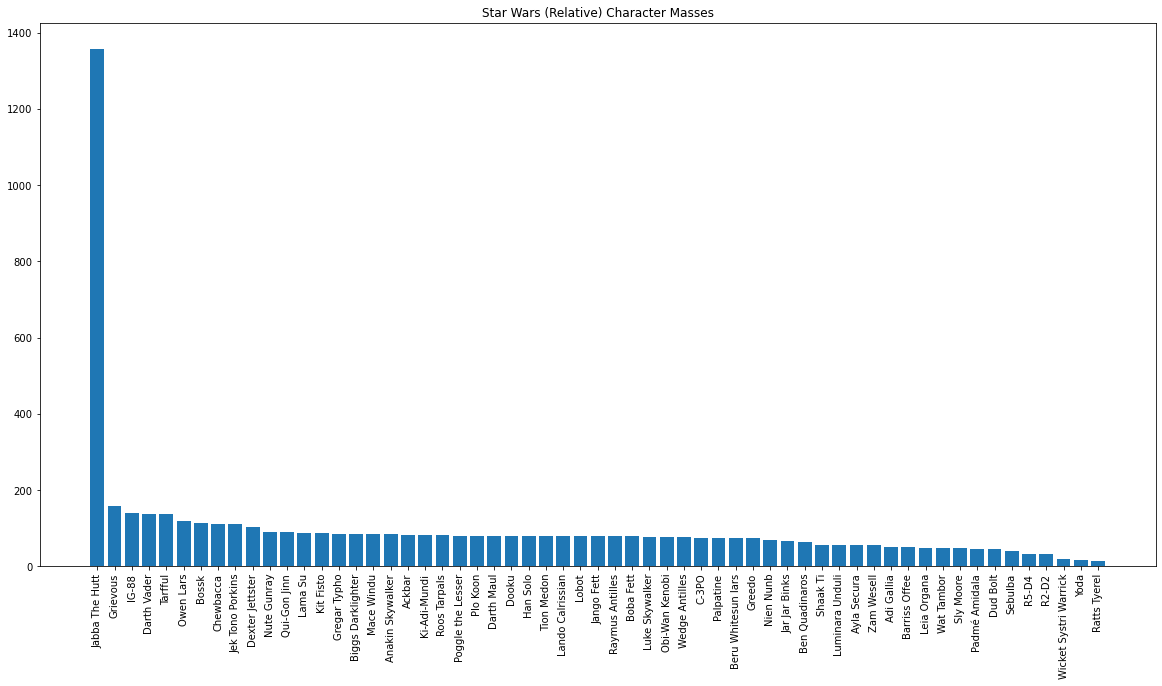

In [16]:
#bar chart for character masses
tick_locations = [value for value in clean_characters_df["Character"]]
labels = clean_characters_df["Character"]
plt.figure(figsize=(20, 10))
plt.bar(mass_df["Character"], mass_df["Mass"])
plt.xticks(tick_locations, labels, rotation="vertical")
plt.title("Star Wars (Relative) Character Masses")
plt.savefig("Figures/Bar_Character_Mass.png")
plt.show()

In [17]:
plot_mass_df = mass_df.drop(columns=["Height", "URL", "First Film", "Last Film", "Number of Film Appearances"])
plot_mass_df

,Character,Mass
14,Jabba The Hutt,1358.0
54,Grievous,159.0
20,IG-88,140.0
3,Darth Vader,136.0
55,Tarfful,136.0
5,Owen Lars,120.0
21,Bossk,113.0
11,Chewbacca,112.0
16,Jek Tono Porkins,110.0
50,Dexter Jettster,102.0


In [18]:
# separate Characters into Jabba and Everyone else
jabba_mass_df = plot_mass_df[0:1]
other_characters_mass_df = plot_mass_df[1 : 59]

#Find the sum of the masses of characters in each category and save the figures
jabba_mass = jabba_mass_df["Mass"].sum()
other_characters_mass = other_characters_mass_df["Mass"].sum()
print(jabba_mass)
print(other_characters_mass)

1358.0
4383.4


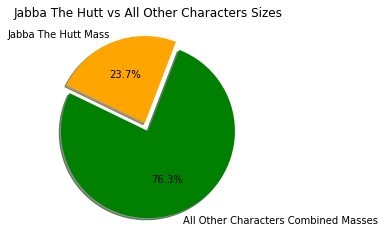

In [19]:
#Pie Chart for Jabba The Hutt vs All Other Characters
labels = ["Jabba The Hutt Mass", "All Other Characters Combined Masses"]
ship_size_list = [jabba_mass, other_characters_mass]
colors = ["orange", "green"]
explode = (0.1, 0)
plt.pie(ship_size_list, explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 69)
plt.title("Jabba The Hutt vs All Other Characters Sizes")
plt.savefig("Figures/Pie_Jabba_Mass_Vs.png")
plt.show()

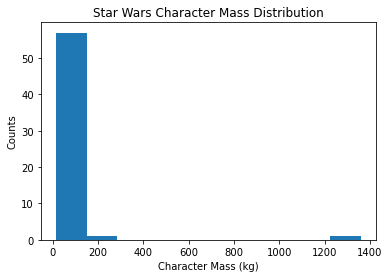

NormaltestResult(statistic=1.3280574173591142, pvalue=0.5147732797835652)
------------------------------------------
The sample standard deviation is 168.0
The sample variance using the NumPy module is 28229.0
------------------------------------------
The mean mass of Star Wars characters with Jabba is 97.3
------------------------------------------
Roughly 68% of the data is between -70.7 and 265.3 kgs
Roughly 95% of the data is between -238.7 and 433.3 kgs
Roughly 99.7% of the data is between -406.7 and 601.4 kgs


In [20]:
plt.hist(mass_df["Mass"])
plt.title("Star Wars Character Mass Distribution")
plt.xlabel("Character Mass (kg)")
plt.ylabel("Counts")
plt.savefig("Figures/Hist_Character_Mass.png")
plt.show()
print(sts.normaltest(mass_df["Mass"].sample(50)))
print('------------------------------------------')
#stdev and var using numpy
sd_numpy = np.std(mass_df["Mass"],ddof = 0)
print(f"The sample standard deviation is {round(sd_numpy,1)}")
var_numpy = np.var(mass_df["Mass"],ddof = 0)
print(f"The sample variance using the NumPy module is {round(var_numpy,1)}")
print('------------------------------------------')
# Calculate the 68-95-99.7 rule using the standard deviation
mean_numpy = np.mean(mass_df["Mass"])
print(f"The mean mass of Star Wars characters with Jabba is {round(mean_numpy,1)}")
print('------------------------------------------')
print(f"Roughly 68% of the data is between {round(mean_numpy-sd_numpy,1)} and {round(mean_numpy+sd_numpy,1)} kgs")
print(f"Roughly 95% of the data is between {round(mean_numpy-2*sd_numpy,1)} and {round(mean_numpy+2*sd_numpy,1)} kgs")
print(f"Roughly 99.7% of the data is between {round(mean_numpy-3*sd_numpy,1)} and {round(mean_numpy+3*sd_numpy,1)} kgs")

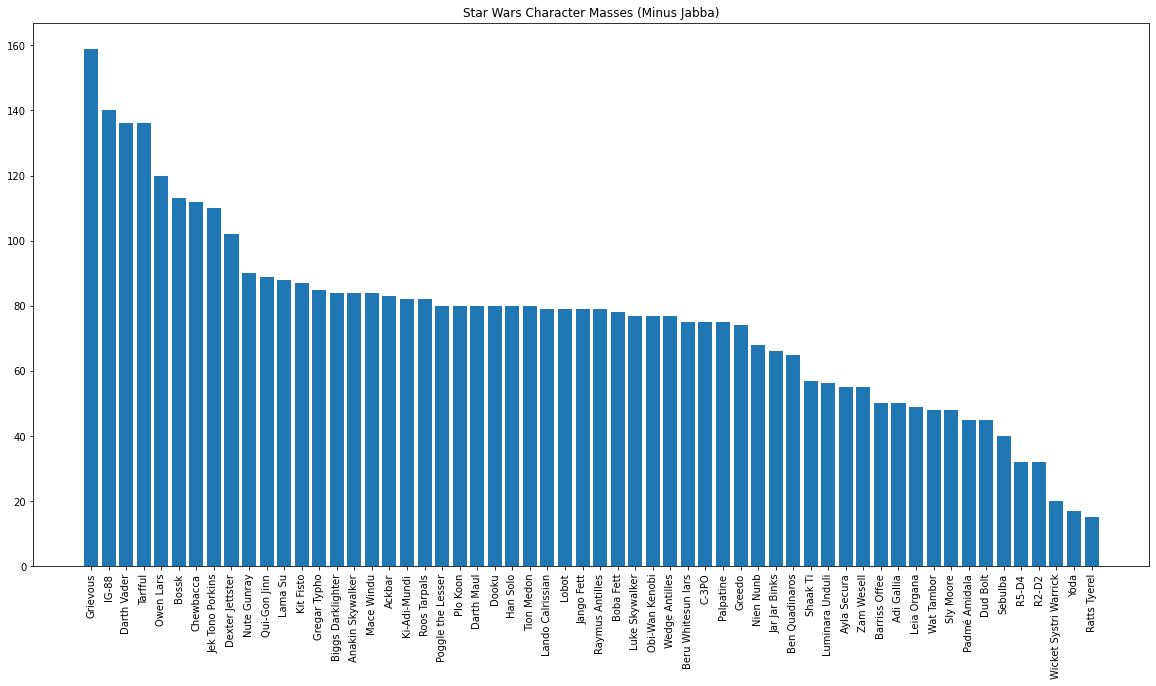

In [21]:
no_jabba_mass_df = clean_characters_df.drop([14])
no_jabba_mass_df = no_jabba_mass_df.sort_values(["Mass"], ascending=False)
no_jabba_mass_df = no_jabba_mass_df.reset_index(drop=True)

tick_locations = [value for value in no_jabba_mass_df["Character"]]
labels = no_jabba_mass_df["Character"]
plt.figure(figsize=(20, 10))
plt.bar(no_jabba_mass_df["Character"], no_jabba_mass_df["Mass"])
plt.xticks(tick_locations, labels, rotation="vertical")
plt.title("Star Wars Character Masses (Minus Jabba)")
plt.savefig("Figures/Bar_Character_Mass_NoJabba.png")
plt.show()

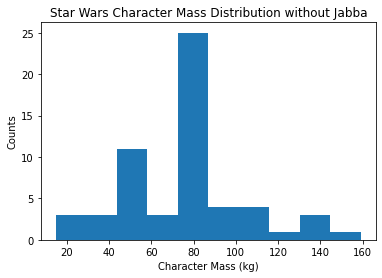

NormaltestResult(statistic=2.5836943669687895, pvalue=0.27476277678037164)
------------------------------------------
The sample standard deviation is 29.0
The sample variance using the NumPy module is 841.0
------------------------------------------
The mean mass of Star Wars characters without Jabba is 75.6
------------------------------------------
Roughly 68% of the data is between 46.6 and 104.6 kgs
Roughly 95% of the data is between 17.6 and 133.6 kgs
Roughly 99.7% of the data is between -11.4 and 162.6 kgs


In [22]:
plt.hist(no_jabba_mass_df["Mass"])
plt.title("Star Wars Character Mass Distribution without Jabba")
plt.xlabel("Character Mass (kg)")
plt.ylabel("Counts")
plt.savefig("Figures/Hist_Character_Mass_NoJabba.png")
plt.show()
print(sts.normaltest(no_jabba_mass_df["Mass"].sample(50)))
print('------------------------------------------')
#stdev and var using numpy
sd_numpy = np.std(no_jabba_mass_df["Mass"],ddof = 0)
print(f"The sample standard deviation is {round(sd_numpy,1)}")
var_numpy = np.var(no_jabba_mass_df["Mass"],ddof = 0)
print(f"The sample variance using the NumPy module is {round(var_numpy,1)}")
print('------------------------------------------')
# Calculate the 68-95-99.7 rule using the standard deviation
mean_numpy = np.mean(no_jabba_mass_df["Mass"])
print(f"The mean mass of Star Wars characters without Jabba is {round(mean_numpy,1)}")
print('------------------------------------------')
print(f"Roughly 68% of the data is between {round(mean_numpy-sd_numpy,1)} and {round(mean_numpy+sd_numpy,1)} kgs")
print(f"Roughly 95% of the data is between {round(mean_numpy-2*sd_numpy,1)} and {round(mean_numpy+2*sd_numpy,1)} kgs")
print(f"Roughly 99.7% of the data is between {round(mean_numpy-3*sd_numpy,1)} and {round(mean_numpy+3*sd_numpy,1)} kgs")

In [23]:
#Statistics Summary
print(f'Statistical Analysis of Mass with Jabba:')
print(mass_df["Mass"].describe())
print(f'Statistical Analysis of Mass without Jabba:')
print(no_jabba_mass_df["Mass"].describe())


Statistical Analysis of Mass with Jabba:
count      59.000000
mean       97.311864
std       169.457163
min        15.000000
25%        55.600000
50%        79.000000
75%        84.500000
max      1358.000000
Name: Mass, dtype: float64
Statistical Analysis of Mass without Jabba:
count     58.000000
mean      75.575862
std       29.252514
min       15.000000
25%       55.300000
50%       79.000000
75%       84.000000
max      159.000000
Name: Mass, dtype: float64


# Star Wars Starships

In [24]:
#starships
url_starships = "http://swapi.dev/api/starships/"
starships_response = requests.get(url_starships).json()
print(json.dumps(starships_response, indent=2, sort_keys=True))

{
  "count": 36,
  "next": "http://swapi.dev/api/starships/?page=2",
  "previous": null,
  "results": [
    {
      "MGLT": "60",
      "cargo_capacity": "3000000",
      "consumables": "1 year",
      "cost_in_credits": "3500000",
      "created": "2014-12-10T14:20:33.369000Z",
      "crew": "30-165",
      "edited": "2014-12-20T21:23:49.867000Z",
      "films": [
        "http://swapi.dev/api/films/1/",
        "http://swapi.dev/api/films/3/",
        "http://swapi.dev/api/films/6/"
      ],
      "hyperdrive_rating": "2.0",
      "length": "150",
      "manufacturer": "Corellian Engineering Corporation",
      "max_atmosphering_speed": "950",
      "model": "CR90 corvette",
      "name": "CR90 corvette",
      "passengers": "600",
      "pilots": [],
      "starship_class": "corvette",
      "url": "http://swapi.dev/api/starships/2/"
    },
    {
      "MGLT": "60",
      "cargo_capacity": "36000000",
      "consumables": "2 years",
      "cost_in_credits": "150000000",
      "creat

In [25]:
#new lists to store Starship info
starship_names = []
starship_models = []
starship_class = []
starship_length = []
starship_crew = []
starship_films = []
starship_consumables = []
starship_cost = []
page = ["1", "2", "3", "4"]
find_starship_url = f"http://swapi.dev/api/starships/?page="

for x in page:
    find_ships_response = requests.get(find_starship_url + x).json()
    
#for loop to list names in films
    for ships in find_ships_response["results"]:
        ship_name = ships["name"]
        starship_names.append(ship_name)
        ship_model = ships["model"]
        starship_models.append(ship_model)
        ship_class = ships["starship_class"]
        starship_class.append(ship_class)
        ship_length = ships["length"]
        starship_length.append(ship_length)
        ship_crew = ships["crew"]
        starship_crew.append(ship_crew)
        ship_films = ships["films"]
        starship_films.append(ship_films)
        ship_consumables = ships["consumables"]
        starship_consumables.append(ship_consumables)
        ship_cost = ships["cost_in_credits"]
        starship_cost.append(ship_cost)
        print(f'{ship_name} found!')

CR90 corvette found!
Star Destroyer found!
Sentinel-class landing craft found!
Death Star found!
Millennium Falcon found!
Y-wing found!
X-wing found!
TIE Advanced x1 found!
Executor found!
Rebel transport found!
Slave 1 found!
Imperial shuttle found!
EF76 Nebulon-B escort frigate found!
Calamari Cruiser found!
A-wing found!
B-wing found!
Republic Cruiser found!
Droid control ship found!
Naboo fighter found!
Naboo Royal Starship found!
Scimitar found!
J-type diplomatic barge found!
AA-9 Coruscant freighter found!
Jedi starfighter found!
H-type Nubian yacht found!
Republic Assault ship found!
Solar Sailer found!
Trade Federation cruiser found!
Theta-class T-2c shuttle found!
Republic attack cruiser found!
Naboo star skiff found!
Jedi Interceptor found!
arc-170 found!
Banking clan frigte found!
Belbullab-22 starfighter found!
V-wing found!


In [26]:
starship_df = pd.DataFrame({"Name": starship_names, 
                            "Length (meters)": starship_length,
                            "Model": starship_models,
                            "Class": starship_class,
                            "Cost (credits)": starship_cost,
                            "Consumables": starship_consumables,
                            "Crew": starship_crew,
                            "Films": starship_films
                            })
starship_df

,Name,Length (meters),Model,Class,Cost (credits),Consumables,Crew,Films
0,CR90 corvette,150,CR90 corvette,corvette,3500000,1 year,30-165,"[http://swapi.dev/api/films/1/, http://swapi.d..."
1,Star Destroyer,"1,600",Imperial I-class Star Destroyer,Star Destroyer,150000000,2 years,"47,060","[http://swapi.dev/api/films/1/, http://swapi.d..."
2,Sentinel-class landing craft,38,Sentinel-class landing craft,landing craft,240000,1 month,5,[http://swapi.dev/api/films/1/]
3,Death Star,120000,DS-1 Orbital Battle Station,Deep Space Mobile Battlestation,1000000000000,3 years,"342,953",[http://swapi.dev/api/films/1/]
4,Millennium Falcon,34.37,YT-1300 light freighter,Light freighter,100000,2 months,4,"[http://swapi.dev/api/films/1/, http://swapi.d..."
5,Y-wing,14,BTL Y-wing,assault starfighter,134999,1 week,2,"[http://swapi.dev/api/films/1/, http://swapi.d..."
6,X-wing,12.5,T-65 X-wing,Starfighter,149999,1 week,1,"[http://swapi.dev/api/films/1/, http://swapi.d..."
7,TIE Advanced x1,9.2,Twin Ion Engine Advanced x1,Starfighter,unknown,5 days,1,[http://swapi.dev/api/films/1/]
8,Executor,19000,Executor-class star dreadnought,Star dreadnought,1143350000,6 years,"279,144","[http://swapi.dev/api/films/2/, http://swapi.d..."
9,Rebel transport,90,GR-75 medium transport,Medium transport,unknown,6 months,6,"[http://swapi.dev/api/films/2/, http://swapi.d..."


In [27]:
#clean value "1,600" to "1600" for Star Destroyer Length
starship_df.iloc[[1],[1]] = 1600
#loop to convert all Length values to Floats
for i in range(0, len(starship_df["Length (meters)"])):
    starship_df["Length (meters)"][i]=float(starship_df["Length (meters)"][i])
#sort starships by length
length_starship_df = starship_df.sort_values("Length (meters)", ascending=False)
length_starship_df = length_starship_df.reset_index(drop=True)
length_starship_df = length_starship_df.drop(columns=["Model", "Class", "Cost (credits)", "Consumables", "Crew", "Films"])
length_starship_df

,Name,Length (meters)
0,Death Star,120000
1,Executor,19000
2,Droid control ship,3170
3,Star Destroyer,1600
4,Calamari Cruiser,1200
5,Republic attack cruiser,1137
6,Trade Federation cruiser,1088
7,Banking clan frigte,825
8,Republic Assault ship,752
9,AA-9 Coruscant freighter,390


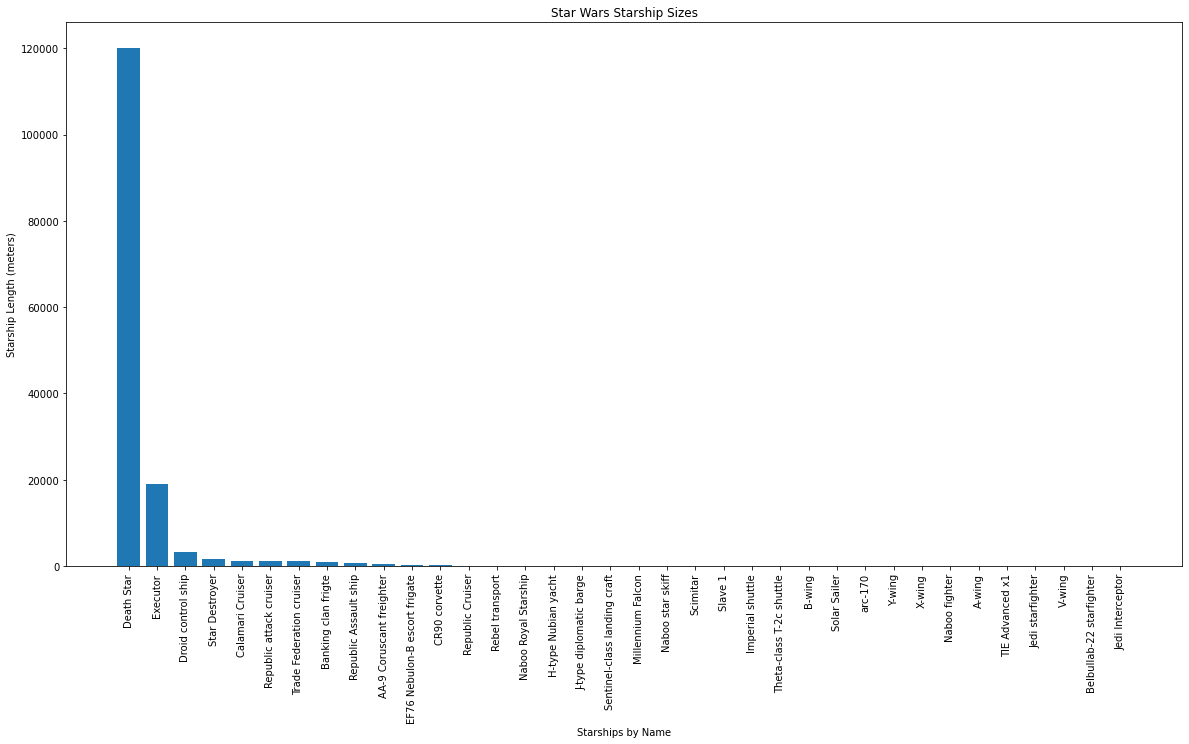

In [28]:
x_axis = length_starship_df["Name"]
y_axis = length_starship_df["Length (meters)"]
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20, 10))
plt.bar(x_axis, y_axis, align="center")
plt.xticks(tick_locations, x_axis, rotation="vertical")
plt.title("Star Wars Starship Sizes")
plt.xlabel("Starships by Name")
plt.ylabel("Starship Length (meters)")
#plt.tight_layout()
plt.show()

In [29]:
# separate ships into Death Star vs Everything else
deathstar_df = length_starship_df[0:1]
other_starships_df = length_starship_df[1 : 34]

deathstar_df

,Name,Length (meters)
0,Death Star,120000


In [30]:
#Find the sum of the lengths of ships in each category and save the figures
deathstar_size = deathstar_df["Length (meters)"].sum()
other_starships_size = other_starships_df["Length (meters)"].sum()

print(deathstar_size)
print(other_starships_size)

120000.0
30286.770000000004


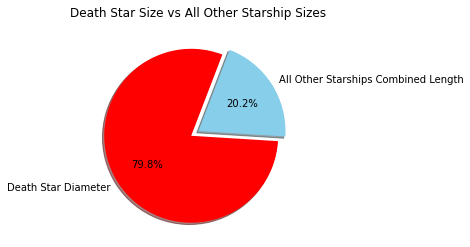

In [31]:
#Pie Chart for Ship Sizes vs Death Star
labels = ["Death Star Diameter", "All Other Starships Combined Length"]
ship_size_list = [deathstar_size, other_starships_size]
colors = ["red", "skyblue"]
explode = (0.1, 0)
plt.pie(ship_size_list, explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 69)
plt.title("Death Star Size vs All Other Starship Sizes")
plt.savefig("Figures/Pie_Ships_Deathstar_VS.png")
plt.show()